<a href="https://colab.research.google.com/github/Rudrajit12/Bot-Prediction-Challenge/blob/main/Bot_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bot Prediction:**

## **Problem Statement:**
Build a Model that can detect the Non Human Traffic present on a website!!!

## **Why do we need to detect Bots?**

No matter how big your website is, you’re almost guaranteed to receive bot traffic at some point. These bots are often up to a range of different things on your site, from indexing web pages to scraping your content. With so many different bots out there, how can you detect bot traffic on your website? And should you be concerned?

## **Here are 5 reasons why we need BOT Detection.**

* Bots can steal your content. You know that content you worked so hard to develop? Your carefully crafted blog posts and pages? All that effort could be wasted in a second if you let bots access your site. Bots can scrape your website for data, information, and even pricing in just a matter of minutes. Then, it can be used on other sites, redistributed or even sold for profit in other areas of the web.

* Bots can slow down your site. Bots bog down your site and overwhelm it with inauthentic, fraudulent traffic. This results in slower page load times for your actual paying customers, which could affect their level of satisfaction or even deter them from buying or visiting altogether.

* Bots can threaten your website. Malicious bots can hack your website, insert inappropriate links and content, or even crash your site altogether. This can hurt your traffic, your customers, and sales.

* Bots can take up extra time and money. Many bots spend their time posting spam comments to websites and blogs. While this may not seem like a huge issue, it can be quite frustrating. You’ll have to spend hours each month sorting through these comments to separate the human commenters from the fraudulent ones, which takes you and your resources away from actually running your business. If you don’t remove these spam comments, they end up annoying your readers and possibly leading them away from your site.

* Bots can mess up your analytics. Analytics are hugely important to a website owner. They tell you how your site is performing, where traffic is coming from, and what you might want to tweak throughout the site. Unfortunately, if you have a significant amount of bots accessing your site, this can throw your analytics into upheaval. You won’t have a clear picture of your site’s performance or your next steps for improvement, and you won’t be able to tell what’s real and what’s fake.

## **Load the dataset and understand the variables present in it**

In [1]:
# Loading and importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [13,9]
sns.set(rc={'figure.figsize':(13,9)})

In [2]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# loading the data
bot_df = pd.read_csv('/content/drive/My Drive/Bot Prediction Kaggle Challenge/train.csv')
bot_df.head()

,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,wk,mth,yr,page_vw_ts,target
0,United Kingdom,UKI,Europe,BARLOW,DERBYSHIRE,HSBC.COM,NaN,MICROSOFT_WINDOWS7,d96016a12f445fb7fadb4ff2396934c8345684f9f60299...,MOZILLA/5.0 (WINDOWS NT 6.1; WOW64) APPLEWEBKI...,1,0,1,www.ibm.com/support/knowledgecenter/en/ss88xh_...,11,3,2019,2019-06-04 02:28:14.011700,1
1,Liechtenstein,DACH,Europe,VADUZ,VADUZ,LLB.LI,NaN,MICROSOFT_WINDOWS8.1,80e5ef49efbe02e7a7f34a5fb482cd748aa27f3409acc8...,MOZILLA/5.0 (WINDOWS NT 6.3; WIN64; X64) APPLE...,1,0,1,www.ibm.com/support/knowledgecenter/ssphqg_7.2...,11,3,2019,2019-06-04 07:17:42.032000,1
2,United Kingdom,UKI,Europe,THORNEY,PETERBOROUGH,NaN,NaN,MICROSOFT_WINDOWS7,9d847da112b5b428419bee77e4387f8d08e7139045285d...,MOZILLA/5.0 (WINDOWS NT 6.1; WIN64; X64) APPLE...,1,0,1,www-01.ibm.com/support/docview.wss?uid=swg2197...,11,3,2019,2019-06-04 09:33:01.080800,1
3,China,Greater China,Greater China Group,BEIJING,BEIJING SHI,NaN,NaN,MICROSOFT_WINDOWS10,16d56bf0f01a14b3f5c97389648b9a01f9f05e0890d0b1...,MOZILLA/5.0 (WINDOWS NT 10.0; WIN64; X64) APPL...,1,1,1,www.ibm.com/support/knowledgecenter/zh/sstfxa_...,11,3,2019,2019-06-04 06:42:19.017100,1
4,India,India-South Asia,Asia Pacific,NEW DELHI,DELHI,TCS.COM,NaN,MICROSOFT_WINDOWS7,7deb0d8f51dd6d5e10fa7fbc1a7eec42a9a6837058e1e0...,MOZILLA/5.0 (WINDOWS NT 6.1; WOW64) APPLEWEBKI...,1,1,1,www.ibm.com/support/knowledgecenter/en/ssplfc_...,11,3,2019,2019-06-04 06:34:28.068900,1


In [4]:
# last 5 rows of the data
bot_df.tail()

,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,wk,mth,yr,page_vw_ts,target
186809,Australia,Australia/NZ,Asia Pacific,MELBOURNE,VICTORIA,PRONTO.COM.AU,NaN,MICROSOFT_WINDOWS10,9e924f8db5fdf3b5ee42b8447d385352adf320026beb5e...,MOZILLA/5.0 (WINDOWS NT 10.0; WIN64; X64) APPL...,1,1,2,www.ibm.com/support/knowledgecenter/en/ssep7j_...,11,3,2019,2019-06-04 14:02:08.015100,1
186810,Japan,Japan,Japan,CHIYODA-KU,TOKYO,TANAKA-ELEC.CO.JP,NaN,MICROSOFT_WINDOWS10,30648a1807cb17394886774193523fc722f166ad5bc774...,MOZILLA/5.0 (WINDOWS NT 10.0; WOW64; TRIDENT/7...,1,1,1,www.ibm.com/ibm/jp/ja/sgc/igsch/jp-igsch-adopt...,11,3,2019,2019-06-04 04:25:29.051500,1
186811,United States,United States,North America,RIVERSIDE,RHODE ISLAND,NaN,NaN,MICROSOFT_WINDOWS7,1323c6f4b744c13d7c7eb261707f818ac68d02207a5e39...,MOZILLA/5.0 (WINDOWS NT 6.1; WOW64) APPLEWEBKI...,1,0,1,www.ibm.com/support/knowledgecenter/en/ssepgg_...,11,3,2019,2019-06-04 12:31:06.062500,1
186812,India,India-South Asia,Asia Pacific,NEW DELHI,DELHI,NaN,NaN,MICROSOFT_WINDOWS10,ab4f72c9de59e0d144cd95eb6c3c11c77826c85ac935f9...,MOZILLA/5.0 (WINDOWS NT 10.0; WIN64; X64) APPL...,1,1,1,www.redbooks.ibm.com/abstracts/sg247640.html,11,3,2019,2019-06-04 07:33:05.032400,1
186813,Brazil,Brazil,Latin America,VITORIA,ESPIRITO SANTO,UFES.BR,NaN,MICROSOFT_WINDOWS10,047dbd761e5705af58396dcf89df2579dff1c43c1b4636...,MOZILLA/5.0 (WINDOWS NT 10.0; WIN64; X64) APPL...,1,0,1,www.ibm.com/support/knowledgecenter/sssa5p_12....,11,3,2019,2019-06-04 11:46:59.052700,1


In [5]:
# number of records present
len(bot_df)

186814

In [6]:
# shape of the dataset
bot_df.shape

(186814, 19)

#### There are 186814 rows and 19 columns in the dataset.

In [7]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [8]:
# check the datatypes of the variables
bot_df.dtypes

ctry_name                      object
intgrtd_mngmt_name             object
intgrtd_operating_team_name    object
city                           object
st                             object
sec_lvl_domn                   object
device_type                    object
operating_sys                  object
ip_addr                        object
user_agent                     object
VISIT                           int64
ENGD_VISIT                      int64
VIEWS                           int64
page_url                       object
wk                              int64
mth                             int64
yr                              int64
page_vw_ts                     object
target                          int64
dtype: object

In [9]:
# check the info of the dataset
bot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186814 entries, 0 to 186813
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   ctry_name                    186814 non-null  object
 1   intgrtd_mngmt_name           186814 non-null  object
 2   intgrtd_operating_team_name  186814 non-null  object
 3   city                         186814 non-null  object
 4   st                           186814 non-null  object
 5   sec_lvl_domn                 132723 non-null  object
 6   device_type                  2361 non-null    object
 7   operating_sys                186814 non-null  object
 8   ip_addr                      186814 non-null  object
 9   user_agent                   186814 non-null  object
 10  VISIT                        186814 non-null  int64 
 11  ENGD_VISIT                   186814 non-null  int64 
 12  VIEWS                        186814 non-null  int64 
 13  page_url      

## **Check for duplicates and missing values:**

In [10]:
# check for duplicates present in the dataset
bot_df.duplicated().sum()

179607

In [11]:
# check for missing values
bot_df.isnull().sum()

ctry_name                           0
intgrtd_mngmt_name                  0
intgrtd_operating_team_name         0
city                                0
st                                  0
sec_lvl_domn                    54091
device_type                    184453
operating_sys                       0
ip_addr                             0
user_agent                          0
VISIT                               0
ENGD_VISIT                          0
VIEWS                               0
page_url                            0
wk                                  0
mth                                 0
yr                                  0
page_vw_ts                        469
target                              0
dtype: int64

#### There are some missing values in sec_lvl_domn, device_type and page_vw_ts columns.
#### We will try to impute these columns with suitable records.

## **Basic EDA & Feature Engineering:**

#### We will try to visualize some features and see the categories or values for each feature. Along with it we will try to create some new features or derive some features which will reduce the number of categories in each feature and might have better predictive power.

In [12]:
# check the distribution of the target variable
bot_df['target'].value_counts()

1    180306
0      6508
Name: target, dtype: int64

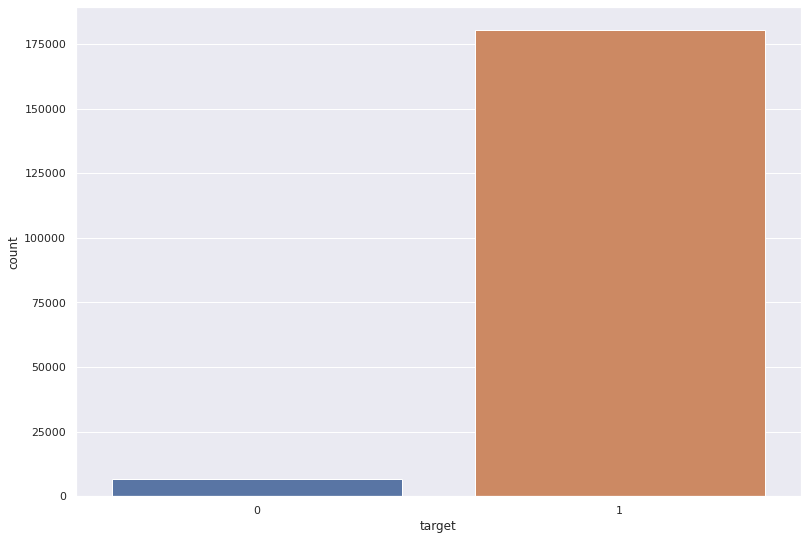

In [13]:
# check the distribution of the target variable
sns.countplot(bot_df['target'])
plt.show()

#### There is a significant imbalance between the target classes in our dataset. We will need to resample our dataset to get better results.

#### We will run our model without resampling and with resampling even to check what is the difference.

In [14]:
# number of unique records in each column
print('Unique countries\n', bot_df['ctry_name'].nunique())
print('Unique team handling the domain\n', bot_df['intgrtd_mngmt_name'].nunique())
print('Unique operating team\n', bot_df['intgrtd_operating_team_name'].nunique())
print('Unique operating system\n', bot_df['operating_sys'].nunique())
print('Unique IP address\n', bot_df['ip_addr'].nunique())
print('Unique browsers\n', bot_df['user_agent'].nunique())

Unique countries
 124
Unique team handling the domain
 20
Unique operating team
 7
Unique operating system
 41
Unique IP address
 7207
Unique browsers
 688


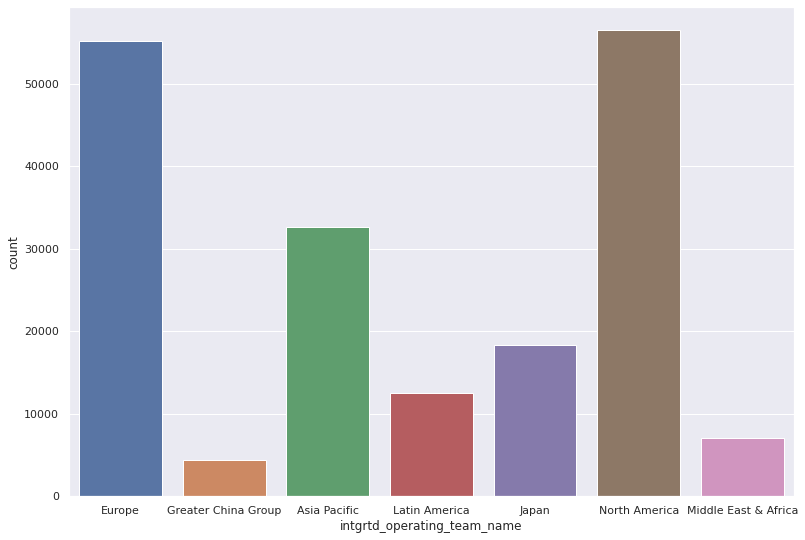

In [15]:
# check the distribution of the operating team
sns.countplot(bot_df['intgrtd_operating_team_name'])
plt.show()

#### We can now combine country, city, state and get the region and drop the rest of the columns.

### **Dealing with the country, city and state columns and deriving region as a combination out of these columns:**

In [16]:
# function to get the region
def region_name(country):
  if country == 'Europe':
    return 'Europe'
  elif country == 'Greater China Group':
    return 'Asia'
  elif country == 'Japan':
    return 'Asia'
  elif country == 'Asia Pacific':
    return 'Asia Pacific'
  elif country == 'Latin America':
    return 'Latin America'
  elif country == 'North America':
    return 'North America'
  else:
    return 'Middle East & Africa'

In [17]:
# apply the function to get the region
bot_df['region'] = bot_df['intgrtd_operating_team_name'].astype(str).apply(region_name)
bot_df.head()

,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,wk,mth,yr,page_vw_ts,target,region
0,United Kingdom,UKI,Europe,BARLOW,DERBYSHIRE,HSBC.COM,NaN,MICROSOFT_WINDOWS7,d96016a12f445fb7fadb4ff2396934c8345684f9f60299...,MOZILLA/5.0 (WINDOWS NT 6.1; WOW64) APPLEWEBKI...,1,0,1,www.ibm.com/support/knowledgecenter/en/ss88xh_...,11,3,2019,2019-06-04 02:28:14.011700,1,Europe
1,Liechtenstein,DACH,Europe,VADUZ,VADUZ,LLB.LI,NaN,MICROSOFT_WINDOWS8.1,80e5ef49efbe02e7a7f34a5fb482cd748aa27f3409acc8...,MOZILLA/5.0 (WINDOWS NT 6.3; WIN64; X64) APPLE...,1,0,1,www.ibm.com/support/knowledgecenter/ssphqg_7.2...,11,3,2019,2019-06-04 07:17:42.032000,1,Europe
2,United Kingdom,UKI,Europe,THORNEY,PETERBOROUGH,NaN,NaN,MICROSOFT_WINDOWS7,9d847da112b5b428419bee77e4387f8d08e7139045285d...,MOZILLA/5.0 (WINDOWS NT 6.1; WIN64; X64) APPLE...,1,0,1,www-01.ibm.com/support/docview.wss?uid=swg2197...,11,3,2019,2019-06-04 09:33:01.080800,1,Europe
3,China,Greater China,Greater China Group,BEIJING,BEIJING SHI,NaN,NaN,MICROSOFT_WINDOWS10,16d56bf0f01a14b3f5c97389648b9a01f9f05e0890d0b1...,MOZILLA/5.0 (WINDOWS NT 10.0; WIN64; X64) APPL...,1,1,1,www.ibm.com/support/knowledgecenter/zh/sstfxa_...,11,3,2019,2019-06-04 06:42:19.017100,1,Asia
4,India,India-South Asia,Asia Pacific,NEW DELHI,DELHI,TCS.COM,NaN,MICROSOFT_WINDOWS7,7deb0d8f51dd6d5e10fa7fbc1a7eec42a9a6837058e1e0...,MOZILLA/5.0 (WINDOWS NT 6.1; WOW64) APPLEWEBKI...,1,1,1,www.ibm.com/support/knowledgecenter/en/ssplfc_...,11,3,2019,2019-06-04 06:34:28.068900,1,Asia Pacific


In [18]:
bot_df['region'].value_counts()

North America           56485
Europe                  55233
Asia Pacific            32701
Asia                    22779
Latin America           12578
Middle East & Africa     7038
Name: region, dtype: int64

#### Now we can drop the country, city, state and along with the operating team name from our dataset as these columns are not giving us any significant information.

In [19]:
# drop the variables named above
bot_df.drop(['ctry_name', 'intgrtd_mngmt_name', 'intgrtd_operating_team_name', 'city', 'st'], axis=1, inplace=True)
bot_df.head()

,sec_lvl_domn,device_type,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,wk,mth,yr,page_vw_ts,target,region
0,HSBC.COM,NaN,MICROSOFT_WINDOWS7,d96016a12f445fb7fadb4ff2396934c8345684f9f60299...,MOZILLA/5.0 (WINDOWS NT 6.1; WOW64) APPLEWEBKI...,1,0,1,www.ibm.com/support/knowledgecenter/en/ss88xh_...,11,3,2019,2019-06-04 02:28:14.011700,1,Europe
1,LLB.LI,NaN,MICROSOFT_WINDOWS8.1,80e5ef49efbe02e7a7f34a5fb482cd748aa27f3409acc8...,MOZILLA/5.0 (WINDOWS NT 6.3; WIN64; X64) APPLE...,1,0,1,www.ibm.com/support/knowledgecenter/ssphqg_7.2...,11,3,2019,2019-06-04 07:17:42.032000,1,Europe
2,NaN,NaN,MICROSOFT_WINDOWS7,9d847da112b5b428419bee77e4387f8d08e7139045285d...,MOZILLA/5.0 (WINDOWS NT 6.1; WIN64; X64) APPLE...,1,0,1,www-01.ibm.com/support/docview.wss?uid=swg2197...,11,3,2019,2019-06-04 09:33:01.080800,1,Europe
3,NaN,NaN,MICROSOFT_WINDOWS10,16d56bf0f01a14b3f5c97389648b9a01f9f05e0890d0b1...,MOZILLA/5.0 (WINDOWS NT 10.0; WIN64; X64) APPL...,1,1,1,www.ibm.com/support/knowledgecenter/zh/sstfxa_...,11,3,2019,2019-06-04 06:42:19.017100,1,Asia
4,TCS.COM,NaN,MICROSOFT_WINDOWS7,7deb0d8f51dd6d5e10fa7fbc1a7eec42a9a6837058e1e0...,MOZILLA/5.0 (WINDOWS NT 6.1; WOW64) APPLEWEBKI...,1,1,1,www.ibm.com/support/knowledgecenter/en/ssplfc_...,11,3,2019,2019-06-04 06:34:28.068900,1,Asia Pacific


### **Dealing with the sec_lvl_domn and segregating it into primary and secondary domain names:**

In [20]:
# check the distribution of domains
bot_df['sec_lvl_domn'].value_counts()

VSNL.NET.IN               2437
CISCO.COM                 1785
HITACHI.CO.JP             1408
OCN.NE.JP                 1367
UCOM.NE.JP                1322
                          ... 
LPMCOM.PT                    1
MEMORIALHEALTHCARE.ORG       1
GLDN.NET                     1
KINGS-SCHOOL.CO.UK           1
CLEARWAVE.COM                1
Name: sec_lvl_domn, Length: 2811, dtype: int64

#### Let us segregate the domain names into primary and secondary domain:

In [21]:
# segregate the domain into primary and secondary
bot_df[['primary_dom','secondary_dom']] = bot_df['sec_lvl_domn'].str.split('.',1,expand=True)
bot_df.head()

,sec_lvl_domn,device_type,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,wk,mth,yr,page_vw_ts,target,region,primary_dom,secondary_dom
0,HSBC.COM,NaN,MICROSOFT_WINDOWS7,d96016a12f445fb7fadb4ff2396934c8345684f9f60299...,MOZILLA/5.0 (WINDOWS NT 6.1; WOW64) APPLEWEBKI...,1,0,1,www.ibm.com/support/knowledgecenter/en/ss88xh_...,11,3,2019,2019-06-04 02:28:14.011700,1,Europe,HSBC,COM
1,LLB.LI,NaN,MICROSOFT_WINDOWS8.1,80e5ef49efbe02e7a7f34a5fb482cd748aa27f3409acc8...,MOZILLA/5.0 (WINDOWS NT 6.3; WIN64; X64) APPLE...,1,0,1,www.ibm.com/support/knowledgecenter/ssphqg_7.2...,11,3,2019,2019-06-04 07:17:42.032000,1,Europe,LLB,LI
2,NaN,NaN,MICROSOFT_WINDOWS7,9d847da112b5b428419bee77e4387f8d08e7139045285d...,MOZILLA/5.0 (WINDOWS NT 6.1; WIN64; X64) APPLE...,1,0,1,www-01.ibm.com/support/docview.wss?uid=swg2197...,11,3,2019,2019-06-04 09:33:01.080800,1,Europe,NaN,NaN
3,NaN,NaN,MICROSOFT_WINDOWS10,16d56bf0f01a14b3f5c97389648b9a01f9f05e0890d0b1...,MOZILLA/5.0 (WINDOWS NT 10.0; WIN64; X64) APPL...,1,1,1,www.ibm.com/support/knowledgecenter/zh/sstfxa_...,11,3,2019,2019-06-04 06:42:19.017100,1,Asia,NaN,NaN
4,TCS.COM,NaN,MICROSOFT_WINDOWS7,7deb0d8f51dd6d5e10fa7fbc1a7eec42a9a6837058e1e0...,MOZILLA/5.0 (WINDOWS NT 6.1; WOW64) APPLEWEBKI...,1,1,1,www.ibm.com/support/knowledgecenter/en/ssplfc_...,11,3,2019,2019-06-04 06:34:28.068900,1,Asia Pacific,TCS,COM


#### Now we can drop the sec_lvl_domn from our dataset as it doesn't give any additional information.

In [22]:
# drop the variables named above
bot_df.drop(['sec_lvl_domn'], axis=1, inplace=True)
bot_df.head()

,device_type,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,wk,mth,yr,page_vw_ts,target,region,primary_dom,secondary_dom
0,NaN,MICROSOFT_WINDOWS7,d96016a12f445fb7fadb4ff2396934c8345684f9f60299...,MOZILLA/5.0 (WINDOWS NT 6.1; WOW64) APPLEWEBKI...,1,0,1,www.ibm.com/support/knowledgecenter/en/ss88xh_...,11,3,2019,2019-06-04 02:28:14.011700,1,Europe,HSBC,COM
1,NaN,MICROSOFT_WINDOWS8.1,80e5ef49efbe02e7a7f34a5fb482cd748aa27f3409acc8...,MOZILLA/5.0 (WINDOWS NT 6.3; WIN64; X64) APPLE...,1,0,1,www.ibm.com/support/knowledgecenter/ssphqg_7.2...,11,3,2019,2019-06-04 07:17:42.032000,1,Europe,LLB,LI
2,NaN,MICROSOFT_WINDOWS7,9d847da112b5b428419bee77e4387f8d08e7139045285d...,MOZILLA/5.0 (WINDOWS NT 6.1; WIN64; X64) APPLE...,1,0,1,www-01.ibm.com/support/docview.wss?uid=swg2197...,11,3,2019,2019-06-04 09:33:01.080800,1,Europe,NaN,NaN
3,NaN,MICROSOFT_WINDOWS10,16d56bf0f01a14b3f5c97389648b9a01f9f05e0890d0b1...,MOZILLA/5.0 (WINDOWS NT 10.0; WIN64; X64) APPL...,1,1,1,www.ibm.com/support/knowledgecenter/zh/sstfxa_...,11,3,2019,2019-06-04 06:42:19.017100,1,Asia,NaN,NaN
4,NaN,MICROSOFT_WINDOWS7,7deb0d8f51dd6d5e10fa7fbc1a7eec42a9a6837058e1e0...,MOZILLA/5.0 (WINDOWS NT 6.1; WOW64) APPLEWEBKI...,1,1,1,www.ibm.com/support/knowledgecenter/en/ssplfc_...,11,3,2019,2019-06-04 06:34:28.068900,1,Asia Pacific,TCS,COM


### **Dealing with the operating systems and getting the device type according to it:**

In [23]:
# check the distribution of the operating system
bot_df['operating_sys'].value_counts()

MICROSOFT_WINDOWS10     100561
MICROSOFT_WINDOWS7       62864
MICROSOFT_WINDOWS8.1      6854
MACINTOSH_OS X 10.14      5513
LINUX                     3876
MACINTOSH_OS X 10.13      2445
MACINTOSH_OS X 10.12       791
MACINTOSH_OS X 10.11       594
ANDROID_8.0.0              455
IOS_12.1.4                 430
MICROSOFT_WINDOWS8         303
ANDROID_6.0.1              225
MACINTOSH_OS X 10.10       218
ANDROID_9                  216
IOS_12.1                   205
ANDROID_8.1.0              157
ANDROID_7.0                130
ANDROID_7.1.2              108
MACINTOSH_OS X 10.9        107
MICROSOFT_WINXP             92
IOS_12.1.2                  86
MACINTOSH_OS X 10.8         84
MICROSOFT_WINNT             61
ANDROID_5.1.1               57
ANDROID_4.4.2               49
CHROMEOS                    43
IOS_12.0                    39
IOS_12.1.1                  38
MICROSOFT_WINVISTA          37
ANDROID_5.1                 32
ANDROID_7.1.1               22
IOS_11.3                    18
ANDROID_

In [24]:
# get the initials of the operating system out
bot_df['os'] = bot_df['operating_sys'].astype(str).apply(lambda x: x.split('_')[0])
bot_df.head()

,device_type,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,wk,mth,yr,page_vw_ts,target,region,primary_dom,secondary_dom,os
0,NaN,MICROSOFT_WINDOWS7,d96016a12f445fb7fadb4ff2396934c8345684f9f60299...,MOZILLA/5.0 (WINDOWS NT 6.1; WOW64) APPLEWEBKI...,1,0,1,www.ibm.com/support/knowledgecenter/en/ss88xh_...,11,3,2019,2019-06-04 02:28:14.011700,1,Europe,HSBC,COM,MICROSOFT
1,NaN,MICROSOFT_WINDOWS8.1,80e5ef49efbe02e7a7f34a5fb482cd748aa27f3409acc8...,MOZILLA/5.0 (WINDOWS NT 6.3; WIN64; X64) APPLE...,1,0,1,www.ibm.com/support/knowledgecenter/ssphqg_7.2...,11,3,2019,2019-06-04 07:17:42.032000,1,Europe,LLB,LI,MICROSOFT
2,NaN,MICROSOFT_WINDOWS7,9d847da112b5b428419bee77e4387f8d08e7139045285d...,MOZILLA/5.0 (WINDOWS NT 6.1; WIN64; X64) APPLE...,1,0,1,www-01.ibm.com/support/docview.wss?uid=swg2197...,11,3,2019,2019-06-04 09:33:01.080800,1,Europe,NaN,NaN,MICROSOFT
3,NaN,MICROSOFT_WINDOWS10,16d56bf0f01a14b3f5c97389648b9a01f9f05e0890d0b1...,MOZILLA/5.0 (WINDOWS NT 10.0; WIN64; X64) APPL...,1,1,1,www.ibm.com/support/knowledgecenter/zh/sstfxa_...,11,3,2019,2019-06-04 06:42:19.017100,1,Asia,NaN,NaN,MICROSOFT
4,NaN,MICROSOFT_WINDOWS7,7deb0d8f51dd6d5e10fa7fbc1a7eec42a9a6837058e1e0...,MOZILLA/5.0 (WINDOWS NT 6.1; WOW64) APPLEWEBKI...,1,1,1,www.ibm.com/support/knowledgecenter/en/ssplfc_...,11,3,2019,2019-06-04 06:34:28.068900,1,Asia Pacific,TCS,COM,MICROSOFT


In [25]:
# function to define less categories in operating sys
def change_os(os):
  if os == 'MICROSOFT':
    return 'Windows'
  elif os == 'LINUX':
    return 'Linux'
  elif os == 'MACINTOSH':
    return 'MacOS'
  elif os == 'ANDROID':
    return 'Android'
  elif os == 'IOS':
    return 'IOS'
  else:
    return 'ChromeOS'

In [26]:
# apply the function to get the operating system
bot_df['operating_sys'] = bot_df['os'].apply(change_os)
bot_df.head()

,device_type,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,wk,mth,yr,page_vw_ts,target,region,primary_dom,secondary_dom,os
0,NaN,Windows,d96016a12f445fb7fadb4ff2396934c8345684f9f60299...,MOZILLA/5.0 (WINDOWS NT 6.1; WOW64) APPLEWEBKI...,1,0,1,www.ibm.com/support/knowledgecenter/en/ss88xh_...,11,3,2019,2019-06-04 02:28:14.011700,1,Europe,HSBC,COM,MICROSOFT
1,NaN,Windows,80e5ef49efbe02e7a7f34a5fb482cd748aa27f3409acc8...,MOZILLA/5.0 (WINDOWS NT 6.3; WIN64; X64) APPLE...,1,0,1,www.ibm.com/support/knowledgecenter/ssphqg_7.2...,11,3,2019,2019-06-04 07:17:42.032000,1,Europe,LLB,LI,MICROSOFT
2,NaN,Windows,9d847da112b5b428419bee77e4387f8d08e7139045285d...,MOZILLA/5.0 (WINDOWS NT 6.1; WIN64; X64) APPLE...,1,0,1,www-01.ibm.com/support/docview.wss?uid=swg2197...,11,3,2019,2019-06-04 09:33:01.080800,1,Europe,NaN,NaN,MICROSOFT
3,NaN,Windows,16d56bf0f01a14b3f5c97389648b9a01f9f05e0890d0b1...,MOZILLA/5.0 (WINDOWS NT 10.0; WIN64; X64) APPL...,1,1,1,www.ibm.com/support/knowledgecenter/zh/sstfxa_...,11,3,2019,2019-06-04 06:42:19.017100,1,Asia,NaN,NaN,MICROSOFT
4,NaN,Windows,7deb0d8f51dd6d5e10fa7fbc1a7eec42a9a6837058e1e0...,MOZILLA/5.0 (WINDOWS NT 6.1; WOW64) APPLEWEBKI...,1,1,1,www.ibm.com/support/knowledgecenter/en/ssplfc_...,11,3,2019,2019-06-04 06:34:28.068900,1,Asia Pacific,TCS,COM,MICROSOFT


In [27]:
# check the distribution of the operating system
bot_df['operating_sys'].value_counts()

Windows     170772
MacOS         9762
Linux         3876
Android       1468
IOS            893
ChromeOS        43
Name: operating_sys, dtype: int64

In [28]:
# fill up device type with the help of operating system
def fill_device(ops):
  if ops == 'Windows':
    return 'Computer'
  elif ops == 'MacOS':
    return 'Computer'
  elif ops == 'Linux':
    return 'Computer'
  elif ops == 'Android':
    return 'Mobile Phone'
  elif ops == 'IOS':
    return 'Mobile Phone'
  else:
    return 'Computer'

In [29]:
# apply the function
bot_df['device_type'] = bot_df['operating_sys'].astype(str).apply(fill_device)
bot_df.head()

,device_type,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,wk,mth,yr,page_vw_ts,target,region,primary_dom,secondary_dom,os
0,Computer,Windows,d96016a12f445fb7fadb4ff2396934c8345684f9f60299...,MOZILLA/5.0 (WINDOWS NT 6.1; WOW64) APPLEWEBKI...,1,0,1,www.ibm.com/support/knowledgecenter/en/ss88xh_...,11,3,2019,2019-06-04 02:28:14.011700,1,Europe,HSBC,COM,MICROSOFT
1,Computer,Windows,80e5ef49efbe02e7a7f34a5fb482cd748aa27f3409acc8...,MOZILLA/5.0 (WINDOWS NT 6.3; WIN64; X64) APPLE...,1,0,1,www.ibm.com/support/knowledgecenter/ssphqg_7.2...,11,3,2019,2019-06-04 07:17:42.032000,1,Europe,LLB,LI,MICROSOFT
2,Computer,Windows,9d847da112b5b428419bee77e4387f8d08e7139045285d...,MOZILLA/5.0 (WINDOWS NT 6.1; WIN64; X64) APPLE...,1,0,1,www-01.ibm.com/support/docview.wss?uid=swg2197...,11,3,2019,2019-06-04 09:33:01.080800,1,Europe,NaN,NaN,MICROSOFT
3,Computer,Windows,16d56bf0f01a14b3f5c97389648b9a01f9f05e0890d0b1...,MOZILLA/5.0 (WINDOWS NT 10.0; WIN64; X64) APPL...,1,1,1,www.ibm.com/support/knowledgecenter/zh/sstfxa_...,11,3,2019,2019-06-04 06:42:19.017100,1,Asia,NaN,NaN,MICROSOFT
4,Computer,Windows,7deb0d8f51dd6d5e10fa7fbc1a7eec42a9a6837058e1e0...,MOZILLA/5.0 (WINDOWS NT 6.1; WOW64) APPLEWEBKI...,1,1,1,www.ibm.com/support/knowledgecenter/en/ssplfc_...,11,3,2019,2019-06-04 06:34:28.068900,1,Asia Pacific,TCS,COM,MICROSOFT


In [30]:
# check the distribution of the device type
bot_df['device_type'].value_counts()

Computer        184453
Mobile Phone      2361
Name: device_type, dtype: int64

In [31]:
# drop the os column
bot_df.drop(['os'], axis=1, inplace=True)
bot_df.head()

,device_type,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,wk,mth,yr,page_vw_ts,target,region,primary_dom,secondary_dom
0,Computer,Windows,d96016a12f445fb7fadb4ff2396934c8345684f9f60299...,MOZILLA/5.0 (WINDOWS NT 6.1; WOW64) APPLEWEBKI...,1,0,1,www.ibm.com/support/knowledgecenter/en/ss88xh_...,11,3,2019,2019-06-04 02:28:14.011700,1,Europe,HSBC,COM
1,Computer,Windows,80e5ef49efbe02e7a7f34a5fb482cd748aa27f3409acc8...,MOZILLA/5.0 (WINDOWS NT 6.3; WIN64; X64) APPLE...,1,0,1,www.ibm.com/support/knowledgecenter/ssphqg_7.2...,11,3,2019,2019-06-04 07:17:42.032000,1,Europe,LLB,LI
2,Computer,Windows,9d847da112b5b428419bee77e4387f8d08e7139045285d...,MOZILLA/5.0 (WINDOWS NT 6.1; WIN64; X64) APPLE...,1,0,1,www-01.ibm.com/support/docview.wss?uid=swg2197...,11,3,2019,2019-06-04 09:33:01.080800,1,Europe,NaN,NaN
3,Computer,Windows,16d56bf0f01a14b3f5c97389648b9a01f9f05e0890d0b1...,MOZILLA/5.0 (WINDOWS NT 10.0; WIN64; X64) APPL...,1,1,1,www.ibm.com/support/knowledgecenter/zh/sstfxa_...,11,3,2019,2019-06-04 06:42:19.017100,1,Asia,NaN,NaN
4,Computer,Windows,7deb0d8f51dd6d5e10fa7fbc1a7eec42a9a6837058e1e0...,MOZILLA/5.0 (WINDOWS NT 6.1; WOW64) APPLEWEBKI...,1,1,1,www.ibm.com/support/knowledgecenter/en/ssplfc_...,11,3,2019,2019-06-04 06:34:28.068900,1,Asia Pacific,TCS,COM


### **Dealing with the user_agent column and reducing the number of categories or browsers by some combination:**

In [32]:
# check the distribution of the user_agent
bot_df['user_agent'].value_counts()

MOZILLA/5.0 (WINDOWS NT 10.0; WIN64; X64) APPLEWEBKIT/537.36 (KHTML  LIKE GECKO) CHROME/72.0.3626.121 SAFARI/537.36                                                                                          47515
MOZILLA/5.0 (WINDOWS NT 6.1; WIN64; X64) APPLEWEBKIT/537.36 (KHTML  LIKE GECKO) CHROME/72.0.3626.121 SAFARI/537.36                                                                                           19080
MOZILLA/5.0 (WINDOWS NT 6.1; WOW64; TRIDENT/7.0; RV:11.0) LIKE GECKO                                                                                                                                         11893
MOZILLA/5.0 (WINDOWS NT 10.0; WOW64; TRIDENT/7.0; RV:11.0) LIKE GECKO                                                                                                                                        11435
MOZILLA/5.0 (WINDOWS NT 10.0; WIN64; X64; RV:65.0) GECKO/20100101 FIREFOX/65.0                                                                              

#### All the browsers are some versions of Mozilla Firefox, so we can reduce it to keep only Mozilla as the category or browser.

#### There are two versions of Mozilla present in the data and 2 records of Dalvik, a browser for Linux users.

In [33]:
# keep only Mozilla as the browser in the user_agent column
bot_df['user_agent'] = bot_df['user_agent'].astype(str).apply(lambda x: x.split('/')[0])
bot_df.head()

,device_type,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,wk,mth,yr,page_vw_ts,target,region,primary_dom,secondary_dom
0,Computer,Windows,d96016a12f445fb7fadb4ff2396934c8345684f9f60299...,MOZILLA,1,0,1,www.ibm.com/support/knowledgecenter/en/ss88xh_...,11,3,2019,2019-06-04 02:28:14.011700,1,Europe,HSBC,COM
1,Computer,Windows,80e5ef49efbe02e7a7f34a5fb482cd748aa27f3409acc8...,MOZILLA,1,0,1,www.ibm.com/support/knowledgecenter/ssphqg_7.2...,11,3,2019,2019-06-04 07:17:42.032000,1,Europe,LLB,LI
2,Computer,Windows,9d847da112b5b428419bee77e4387f8d08e7139045285d...,MOZILLA,1,0,1,www-01.ibm.com/support/docview.wss?uid=swg2197...,11,3,2019,2019-06-04 09:33:01.080800,1,Europe,NaN,NaN
3,Computer,Windows,16d56bf0f01a14b3f5c97389648b9a01f9f05e0890d0b1...,MOZILLA,1,1,1,www.ibm.com/support/knowledgecenter/zh/sstfxa_...,11,3,2019,2019-06-04 06:42:19.017100,1,Asia,NaN,NaN
4,Computer,Windows,7deb0d8f51dd6d5e10fa7fbc1a7eec42a9a6837058e1e0...,MOZILLA,1,1,1,www.ibm.com/support/knowledgecenter/en/ssplfc_...,11,3,2019,2019-06-04 06:34:28.068900,1,Asia Pacific,TCS,COM


In [34]:
# check the distribution of the user_agent again
bot_df['user_agent'].value_counts()

MOZILLA    186812
DALVIK          2
Name: user_agent, dtype: int64

### **Dealing with the page url and getting the name of main page out of the urls:**

In [35]:
# check the distribution of page url
bot_df['page_url'].value_counts()

www.ibm.com/developerworks/community/forums/html/topic                                  1630
www-01.ibm.com/marketing/iwm/iwm/web/download.do?s_pkg=win64-520&source=idpe            1408
www.ibm.com/search                                                                       892
www.ibm.com/ibmweb/myibm/profile/profile-edit.jsp                                        884
myibm.ibm.com/dashboard                                                                  872
                                                                                        ... 
www.ibm.com/account/reg/cl-es/signup?formid=mail-power                                     1
www.ibm.com/events/br/pt/changeexperience                                                  1
www.ibm.com/ie-en                                                                          1
careers.ibm.com/listjobs/all/search/city/haifa/country/il/position-type/professional       1
www.ustream.tv/channel/live-iss-stream/pop-out                        

In [36]:
# check the unique values in page url
bot_df['page_url'].nunique()

5457

#### We can get the main page out of the page urls and mark it as the main category.

#### Most of the visits have been made to a page related to www.ibm.com and its sub pages, thus we can only keep the name of main page here to reduce the categories or values.

In [37]:
# function to define the category of the main page in page url
def page(url):
  if 'ibm' in url:
    return 'IBM'
  elif 'ustream' in url:
    return 'ustream'
  elif 'blueworks' in url:
    return 'blueworks'
  elif 'bluemix' in url:
    return 'mybluemix'
  elif 'lotus' in url:
    return 'lotus'
  elif 'loopback' in url:
    return 'loopback.io'
  elif 'event' or 'booking' in url:
    return 'Registration/Booking'
  else:
    return url

In [38]:
# get the main page out of the page urls
bot_df['page_url'] = bot_df['page_url'].astype(str).apply(page)
bot_df.head()

,device_type,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,wk,mth,yr,page_vw_ts,target,region,primary_dom,secondary_dom
0,Computer,Windows,d96016a12f445fb7fadb4ff2396934c8345684f9f60299...,MOZILLA,1,0,1,IBM,11,3,2019,2019-06-04 02:28:14.011700,1,Europe,HSBC,COM
1,Computer,Windows,80e5ef49efbe02e7a7f34a5fb482cd748aa27f3409acc8...,MOZILLA,1,0,1,IBM,11,3,2019,2019-06-04 07:17:42.032000,1,Europe,LLB,LI
2,Computer,Windows,9d847da112b5b428419bee77e4387f8d08e7139045285d...,MOZILLA,1,0,1,IBM,11,3,2019,2019-06-04 09:33:01.080800,1,Europe,NaN,NaN
3,Computer,Windows,16d56bf0f01a14b3f5c97389648b9a01f9f05e0890d0b1...,MOZILLA,1,1,1,IBM,11,3,2019,2019-06-04 06:42:19.017100,1,Asia,NaN,NaN
4,Computer,Windows,7deb0d8f51dd6d5e10fa7fbc1a7eec42a9a6837058e1e0...,MOZILLA,1,1,1,IBM,11,3,2019,2019-06-04 06:34:28.068900,1,Asia Pacific,TCS,COM


In [39]:
# check the distribution of page url again
bot_df['page_url'].value_counts()

IBM                     179591
ustream                   2130
Registration/Booking      1698
mybluemix                 1294
lotus                     1111
loopback.io                685
blueworks                  305
Name: page_url, dtype: int64

### **Dealing with datetime variable i.e, page_vw_ts:**

In [40]:
# convert it into a datetime object
bot_df['page_vw_ts'] = pd.to_datetime(bot_df['page_vw_ts'])

In [41]:
# extract hour, minute and second from page_vw_ts
bot_df['hour'] = bot_df['page_vw_ts'].dt.hour
bot_df['minute'] = bot_df['page_vw_ts'].dt.minute
bot_df['seconds'] = bot_df['page_vw_ts'].dt.second
bot_df.head()

,device_type,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,wk,mth,yr,page_vw_ts,target,region,primary_dom,secondary_dom,hour,minute,seconds
0,Computer,Windows,d96016a12f445fb7fadb4ff2396934c8345684f9f60299...,MOZILLA,1,0,1,IBM,11,3,2019,2019-06-04 02:28:14.011700,1,Europe,HSBC,COM,2.0,28.0,14.0
1,Computer,Windows,80e5ef49efbe02e7a7f34a5fb482cd748aa27f3409acc8...,MOZILLA,1,0,1,IBM,11,3,2019,2019-06-04 07:17:42.032000,1,Europe,LLB,LI,7.0,17.0,42.0
2,Computer,Windows,9d847da112b5b428419bee77e4387f8d08e7139045285d...,MOZILLA,1,0,1,IBM,11,3,2019,2019-06-04 09:33:01.080800,1,Europe,NaN,NaN,9.0,33.0,1.0
3,Computer,Windows,16d56bf0f01a14b3f5c97389648b9a01f9f05e0890d0b1...,MOZILLA,1,1,1,IBM,11,3,2019,2019-06-04 06:42:19.017100,1,Asia,NaN,NaN,6.0,42.0,19.0
4,Computer,Windows,7deb0d8f51dd6d5e10fa7fbc1a7eec42a9a6837058e1e0...,MOZILLA,1,1,1,IBM,11,3,2019,2019-06-04 06:34:28.068900,1,Asia Pacific,TCS,COM,6.0,34.0,28.0


In [42]:
# drop the page_vw_ts column
bot_df.drop(['page_vw_ts','primary_dom'], axis=1, inplace=True)
bot_df.head()

,device_type,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,wk,mth,yr,target,region,secondary_dom,hour,minute,seconds
0,Computer,Windows,d96016a12f445fb7fadb4ff2396934c8345684f9f60299...,MOZILLA,1,0,1,IBM,11,3,2019,1,Europe,COM,2.0,28.0,14.0
1,Computer,Windows,80e5ef49efbe02e7a7f34a5fb482cd748aa27f3409acc8...,MOZILLA,1,0,1,IBM,11,3,2019,1,Europe,LI,7.0,17.0,42.0
2,Computer,Windows,9d847da112b5b428419bee77e4387f8d08e7139045285d...,MOZILLA,1,0,1,IBM,11,3,2019,1,Europe,NaN,9.0,33.0,1.0
3,Computer,Windows,16d56bf0f01a14b3f5c97389648b9a01f9f05e0890d0b1...,MOZILLA,1,1,1,IBM,11,3,2019,1,Asia,NaN,6.0,42.0,19.0
4,Computer,Windows,7deb0d8f51dd6d5e10fa7fbc1a7eec42a9a6837058e1e0...,MOZILLA,1,1,1,IBM,11,3,2019,1,Asia Pacific,COM,6.0,34.0,28.0


### Dealing with IP addresses:

In [43]:
# check the distribution of ip address
bot_df['ip_addr'].value_counts()

b8a8233899cbd26ba1e2207af00ed76f6d3a2393f9967aa43bd4676d264a2894    1408
0ec667e87013e1398ddaa61c14f7118f0dd6adc9abc2a2a0608545b59960fdc9     590
a652f03df170d22eaeb7c665ddd4f7caf5b715adfcca4bd719188e0c3479af5f     378
1384ff0bfb4d6cf26d87bd9e708a481f49e878e3da1f2a67bb41908c3ef9926b     331
f5ea00b9b7b886aea00a9c66a5efd2d24bd4de3ea549f2d92ed9de4db6817b77     308
                                                                    ... 
c70ec0dbb2b3bef40122a0bdd8be849adab0ec2515bc7bfb80321122cfc9b592       1
8dc58764ac3d85e52569f650d7e89f182e10faf6a42b3c50e66c9b67eac87fb0       1
a6be29cef097e52965885e1ce6137a2efb8390e272762148ef439ca2bece107b       1
a66f99efba3ba4c5951b1c471b3223656699d51d31f6a79bd95613a56e273e24       1
dd62499f4d0c383a024a128ac63d213bfa34c1e1d940282fc541ad0d3a0cca1d       1
Name: ip_addr, Length: 7207, dtype: int64

In [44]:
# number of unique ip addresses
bot_df['ip_addr'].nunique()

7207

### **Information or Description of the Dataset:**

In [45]:
# info() of the data
bot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186814 entries, 0 to 186813
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   device_type    186814 non-null  object 
 1   operating_sys  186814 non-null  object 
 2   ip_addr        186814 non-null  object 
 3   user_agent     186814 non-null  object 
 4   VISIT          186814 non-null  int64  
 5   ENGD_VISIT     186814 non-null  int64  
 6   VIEWS          186814 non-null  int64  
 7   page_url       186814 non-null  object 
 8   wk             186814 non-null  int64  
 9   mth            186814 non-null  int64  
 10  yr             186814 non-null  int64  
 11  target         186814 non-null  int64  
 12  region         186814 non-null  object 
 13  secondary_dom  132723 non-null  object 
 14  hour           186345 non-null  float64
 15  minute         186345 non-null  float64
 16  seconds        186345 non-null  float64
dtypes: float64(3), int64(7), obje

In [46]:
# summary stats
bot_df.describe()

,VISIT,ENGD_VISIT,VIEWS,wk,mth,yr,target,hour,minute,seconds
count,186814.000000,186814.000000,186814.000000,186814.0,186814.0,186814.0,186814.000000,186345.000000,186345.000000,186345.000000
mean,1.293222,0.532444,1.929593,11.0,3.0,2019.0,0.965163,8.631077,29.250170,29.003354
std,6.379685,3.264097,7.228161,0.0,0.0,0.0,0.183367,5.482391,17.410293,17.498365
min,1.000000,0.000000,1.000000,11.0,3.0,2019.0,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,11.0,3.0,2019.0,1.000000,5.000000,14.000000,14.000000
50%,1.000000,0.000000,1.000000,11.0,3.0,2019.0,1.000000,8.000000,29.000000,29.000000
75%,1.000000,1.000000,2.000000,11.0,3.0,2019.0,1.000000,12.000000,44.000000,44.000000
max,788.000000,318.000000,806.000000,11.0,3.0,2019.0,1.000000,23.000000,59.000000,59.000000


#### There are some missing values still in the data and we will look at each category to replace or impute them with suitable values.

### **Dealing with secondary domain and it's missing values:**

In [47]:
# check the distribution of secondary domain
bot_df['secondary_dom'].value_counts()

COM       43336
NET       19604
CO.JP      6962
NE.JP      4715
DE         4522
          ...  
SK.CA         7
AERO          6
RW            5
GOV.SA        4
EDU.PH        1
Name: secondary_dom, Length: 250, dtype: int64

In [48]:
# print unique values in secondary domain
bot_df['secondary_dom'].unique()

array(['COM', 'LI', nan, 'COM.BR', 'NE.JP', 'CO.UK', 'DE', 'IN', 'NET',
       'CO.JP', 'SE', 'COM.TR', 'COM.AR', 'BY', 'EU', 'BE', 'JP', 'PL',
       'CO.ID', 'QC.CA', 'GC.CA', 'LT', 'IT', 'CO.AT', 'COM.PH', 'CA',
       'ORG', 'COM.PL', 'CH', 'VA.US', 'RU', 'NET.IN', 'CO.IN', 'SI',
       'GOV', 'US', 'IL', 'NET.MA', 'CO.KR', 'COM.AU', 'COM.SG', 'GOB.PE',
       'CO.NZ', 'NET.PE', 'SK', 'LOCATION', 'MIL', 'GOVT.NZ', 'ONE', 'CZ',
       'FR', 'NET.ID', 'NL', 'UA', 'ES', 'LU', 'COM.DO', 'NET.UA',
       'COM.MY', 'NET.HK', 'GOV.BR', 'NET.BR', 'CO.TH', 'CLOUD', 'HR',
       'COM.MX', 'NET.AR', 'FI', 'COM.CO', 'EDU', 'GOV.AR', 'EDU.PL',
       'DK', 'RO', 'AT', 'AE', 'NET.CO', 'RS', 'COM.HK', 'COM.CN',
       'CO.ZA', 'MD.US', 'AC.IN', 'HK', 'BIZ', 'NET.MX', 'CO.IL', 'IE',
       'CL', 'HN', 'AC.JP', 'HU', 'PT', 'SCN', 'COM.PE', 'NET.TW', 'PH',
       'KZ', 'UZ', 'COM.PK', 'COM.TW', 'MOSCOW', 'GOV.AU', 'ML', 'ON.CA',
       'GR', 'NET.AU', 'NET.PY', 'BR', 'ND.US', 'INT', 'NET.PK', 'ET',


#### We can observe from the list above that (.com) is the most common secondary domain along with it's country constituents like .co.uk, co.jp etc, thus we will replace the missing values with (com) as the secondary domain.

In [49]:
# replace all nan values with 'com' in secondary domain
bot_df['secondary_dom'].fillna('COM', inplace=True)
bot_df.head()

,device_type,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,wk,mth,yr,target,region,secondary_dom,hour,minute,seconds
0,Computer,Windows,d96016a12f445fb7fadb4ff2396934c8345684f9f60299...,MOZILLA,1,0,1,IBM,11,3,2019,1,Europe,COM,2.0,28.0,14.0
1,Computer,Windows,80e5ef49efbe02e7a7f34a5fb482cd748aa27f3409acc8...,MOZILLA,1,0,1,IBM,11,3,2019,1,Europe,LI,7.0,17.0,42.0
2,Computer,Windows,9d847da112b5b428419bee77e4387f8d08e7139045285d...,MOZILLA,1,0,1,IBM,11,3,2019,1,Europe,COM,9.0,33.0,1.0
3,Computer,Windows,16d56bf0f01a14b3f5c97389648b9a01f9f05e0890d0b1...,MOZILLA,1,1,1,IBM,11,3,2019,1,Asia,COM,6.0,42.0,19.0
4,Computer,Windows,7deb0d8f51dd6d5e10fa7fbc1a7eec42a9a6837058e1e0...,MOZILLA,1,1,1,IBM,11,3,2019,1,Asia Pacific,COM,6.0,34.0,28.0


#### Now, additionally we can mark the secondary domains as trusted or renowned and non-trusted domains and reduce our categories in the secondary domain column.

#### We know that (.com, .net, .gov, .edu, .co, .org, .govt, .ac) are all trusted or most used domains and other ones we will categorize them as non-trusted domains.

In [50]:
# define a function to change the categories
def categories(col):
  if 'COM' in col:
    return 'Trusted'
  elif 'NET' in col:
    return 'Trusted'
  elif 'GOV' in col:
    return 'Trusted'
  elif 'EDU' in col:
    return 'Trusted'
  elif 'CO' in col:
    return 'Trusted'
  elif 'ORG' in col:
    return 'Trusted'
  elif 'GOVT' in col:
    return 'Trusted'
  elif 'AC' in col:
    return 'Trusted'
  else:
    return 'Non-Trusted'

In [51]:
# apply the function to secondary domain
bot_df['sec_lvl_dom'] = bot_df['secondary_dom'].astype(str).apply(categories)
bot_df.head()

,device_type,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,wk,mth,yr,target,region,secondary_dom,hour,minute,seconds,sec_lvl_dom
0,Computer,Windows,d96016a12f445fb7fadb4ff2396934c8345684f9f60299...,MOZILLA,1,0,1,IBM,11,3,2019,1,Europe,COM,2.0,28.0,14.0,Trusted
1,Computer,Windows,80e5ef49efbe02e7a7f34a5fb482cd748aa27f3409acc8...,MOZILLA,1,0,1,IBM,11,3,2019,1,Europe,LI,7.0,17.0,42.0,Non-Trusted
2,Computer,Windows,9d847da112b5b428419bee77e4387f8d08e7139045285d...,MOZILLA,1,0,1,IBM,11,3,2019,1,Europe,COM,9.0,33.0,1.0,Trusted
3,Computer,Windows,16d56bf0f01a14b3f5c97389648b9a01f9f05e0890d0b1...,MOZILLA,1,1,1,IBM,11,3,2019,1,Asia,COM,6.0,42.0,19.0,Trusted
4,Computer,Windows,7deb0d8f51dd6d5e10fa7fbc1a7eec42a9a6837058e1e0...,MOZILLA,1,1,1,IBM,11,3,2019,1,Asia Pacific,COM,6.0,34.0,28.0,Trusted


In [52]:
# check the distribution of secondary domain
bot_df['sec_lvl_dom'].value_counts()

Trusted        148084
Non-Trusted     38730
Name: sec_lvl_dom, dtype: int64

In [53]:
# drop the secondary domain feature
bot_df.drop(['secondary_dom'], axis=1, inplace=True)
bot_df.head()

,device_type,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,wk,mth,yr,target,region,hour,minute,seconds,sec_lvl_dom
0,Computer,Windows,d96016a12f445fb7fadb4ff2396934c8345684f9f60299...,MOZILLA,1,0,1,IBM,11,3,2019,1,Europe,2.0,28.0,14.0,Trusted
1,Computer,Windows,80e5ef49efbe02e7a7f34a5fb482cd748aa27f3409acc8...,MOZILLA,1,0,1,IBM,11,3,2019,1,Europe,7.0,17.0,42.0,Non-Trusted
2,Computer,Windows,9d847da112b5b428419bee77e4387f8d08e7139045285d...,MOZILLA,1,0,1,IBM,11,3,2019,1,Europe,9.0,33.0,1.0,Trusted
3,Computer,Windows,16d56bf0f01a14b3f5c97389648b9a01f9f05e0890d0b1...,MOZILLA,1,1,1,IBM,11,3,2019,1,Asia,6.0,42.0,19.0,Trusted
4,Computer,Windows,7deb0d8f51dd6d5e10fa7fbc1a7eec42a9a6837058e1e0...,MOZILLA,1,1,1,IBM,11,3,2019,1,Asia Pacific,6.0,34.0,28.0,Trusted


#### Now let us fill the missing values in hour, minute, seconds column. As we do not have any specific information regarding these columns so we can impute them with their mean values i.e, (8,29,29).

In [54]:
# replace all nan values with mean values in hours,minute,seconds column
bot_df['hour'].fillna(bot_df['hour'].mean(), inplace=True)
bot_df['minute'].fillna(bot_df['minute'].mean(), inplace=True)
bot_df['seconds'].fillna(bot_df['seconds'].mean(), inplace=True)
bot_df.head()

,device_type,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,wk,mth,yr,target,region,hour,minute,seconds,sec_lvl_dom
0,Computer,Windows,d96016a12f445fb7fadb4ff2396934c8345684f9f60299...,MOZILLA,1,0,1,IBM,11,3,2019,1,Europe,2.0,28.0,14.0,Trusted
1,Computer,Windows,80e5ef49efbe02e7a7f34a5fb482cd748aa27f3409acc8...,MOZILLA,1,0,1,IBM,11,3,2019,1,Europe,7.0,17.0,42.0,Non-Trusted
2,Computer,Windows,9d847da112b5b428419bee77e4387f8d08e7139045285d...,MOZILLA,1,0,1,IBM,11,3,2019,1,Europe,9.0,33.0,1.0,Trusted
3,Computer,Windows,16d56bf0f01a14b3f5c97389648b9a01f9f05e0890d0b1...,MOZILLA,1,1,1,IBM,11,3,2019,1,Asia,6.0,42.0,19.0,Trusted
4,Computer,Windows,7deb0d8f51dd6d5e10fa7fbc1a7eec42a9a6837058e1e0...,MOZILLA,1,1,1,IBM,11,3,2019,1,Asia Pacific,6.0,34.0,28.0,Trusted


#### Now, let us check if our dataset is completely cleaned and ready:

In [55]:
# print info()
bot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186814 entries, 0 to 186813
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   device_type    186814 non-null  object 
 1   operating_sys  186814 non-null  object 
 2   ip_addr        186814 non-null  object 
 3   user_agent     186814 non-null  object 
 4   VISIT          186814 non-null  int64  
 5   ENGD_VISIT     186814 non-null  int64  
 6   VIEWS          186814 non-null  int64  
 7   page_url       186814 non-null  object 
 8   wk             186814 non-null  int64  
 9   mth            186814 non-null  int64  
 10  yr             186814 non-null  int64  
 11  target         186814 non-null  int64  
 12  region         186814 non-null  object 
 13  hour           186814 non-null  float64
 14  minute         186814 non-null  float64
 15  seconds        186814 non-null  float64
 16  sec_lvl_dom    186814 non-null  object 
dtypes: float64(3), int64(7), obje

#### Now we are ready to visualize our data and find correlations in it.

## **Visualizing the features:**

In [56]:
# define the categorical features
cat_features = ['device_type', 'operating_sys', 'user_agent', 'page_url', 'region', 'sec_lvl_dom']


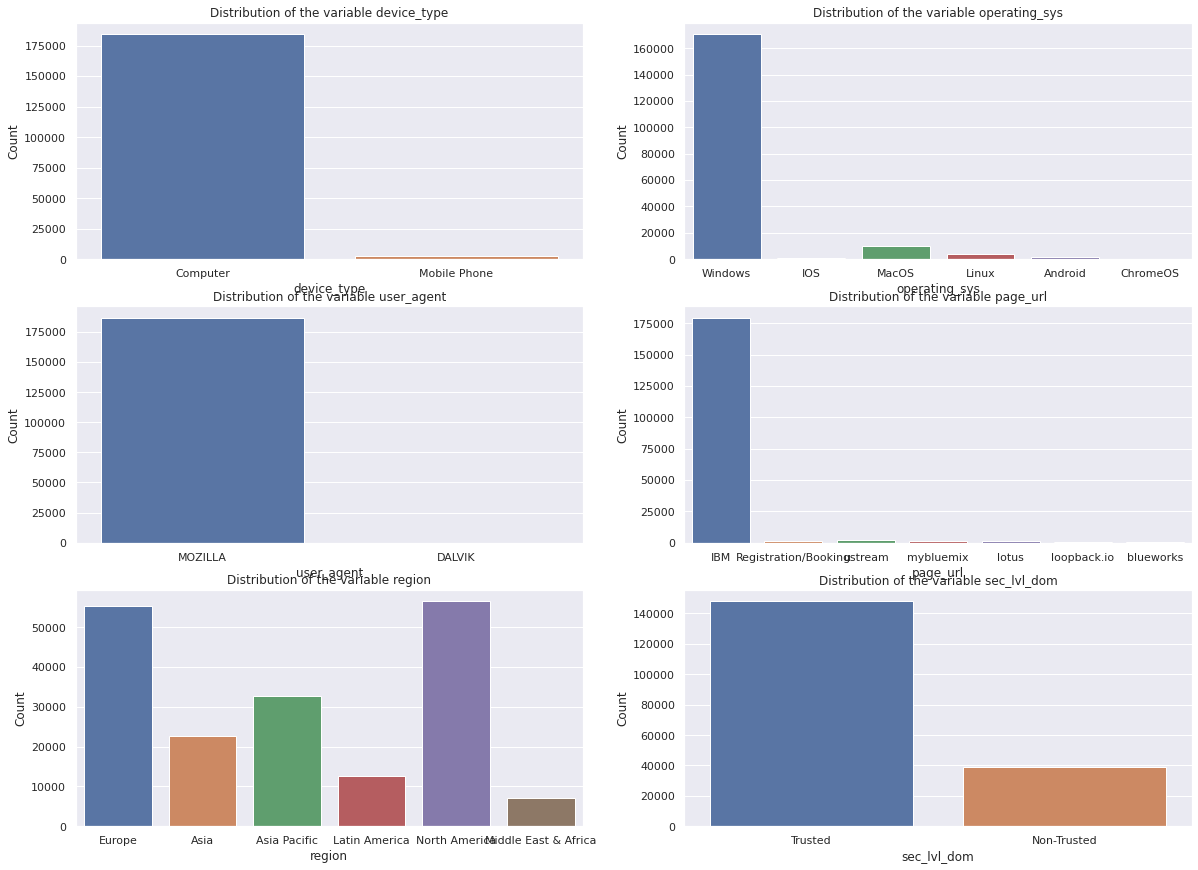

In [57]:
# plot the distribution for the categorical features
count = 1
plt.subplots(figsize=(20,20))
for feature in cat_features:
  plt.subplot(4,2,count)
  sns.countplot(bot_df[feature])
  plt.title(f'Distribution of the variable {feature}')
  plt.xlabel(f'{feature}')
  plt.ylabel('Count')
  count += 1

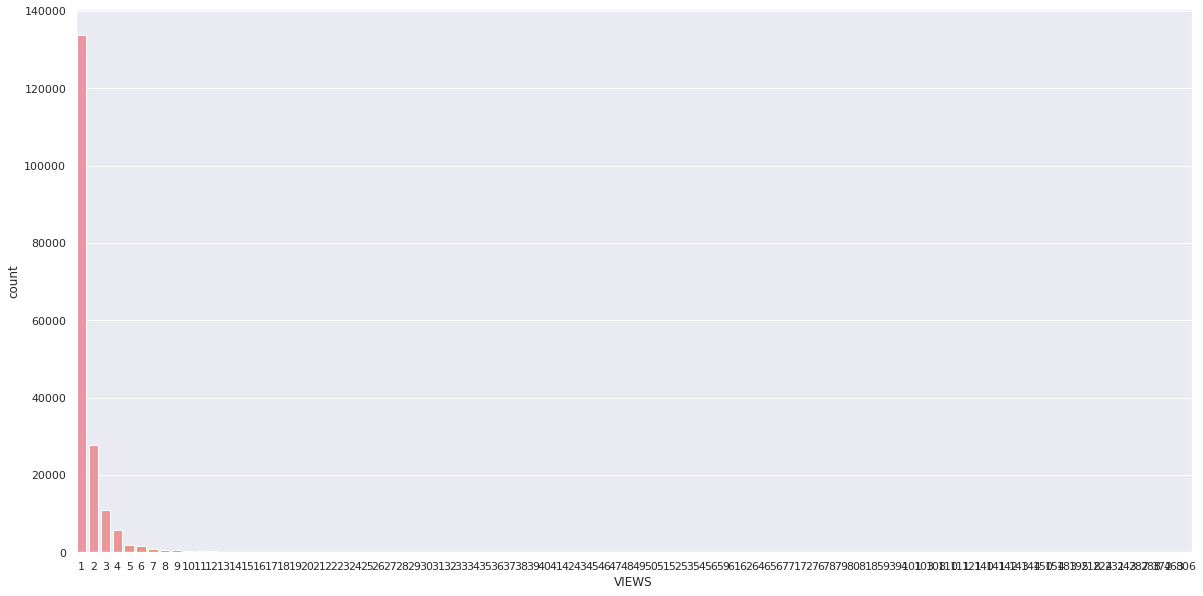

In [58]:
# plot the distribution of views and hour
plt.figure(figsize=(20,10))
sns.countplot(bot_df['VIEWS'])
plt.show()

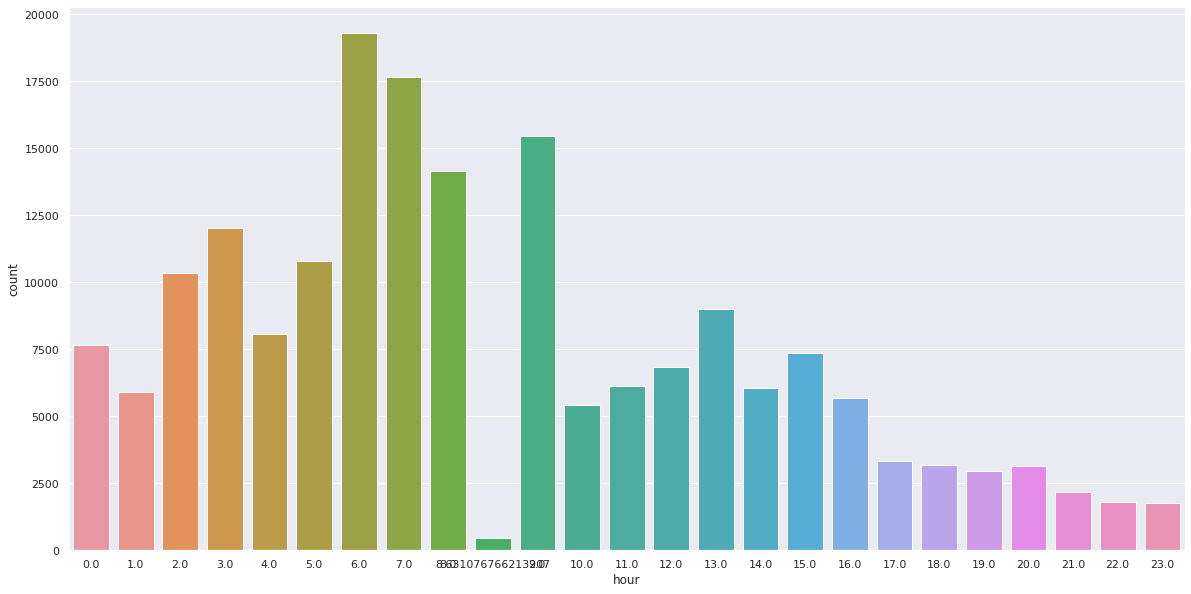

In [59]:
plt.figure(figsize=(20,10))
sns.countplot(bot_df['hour'])
plt.show()

#### We can observe the distributions of our newly created features and we have successfully reduced the number of categories in each feature which will help us in performing encoding.

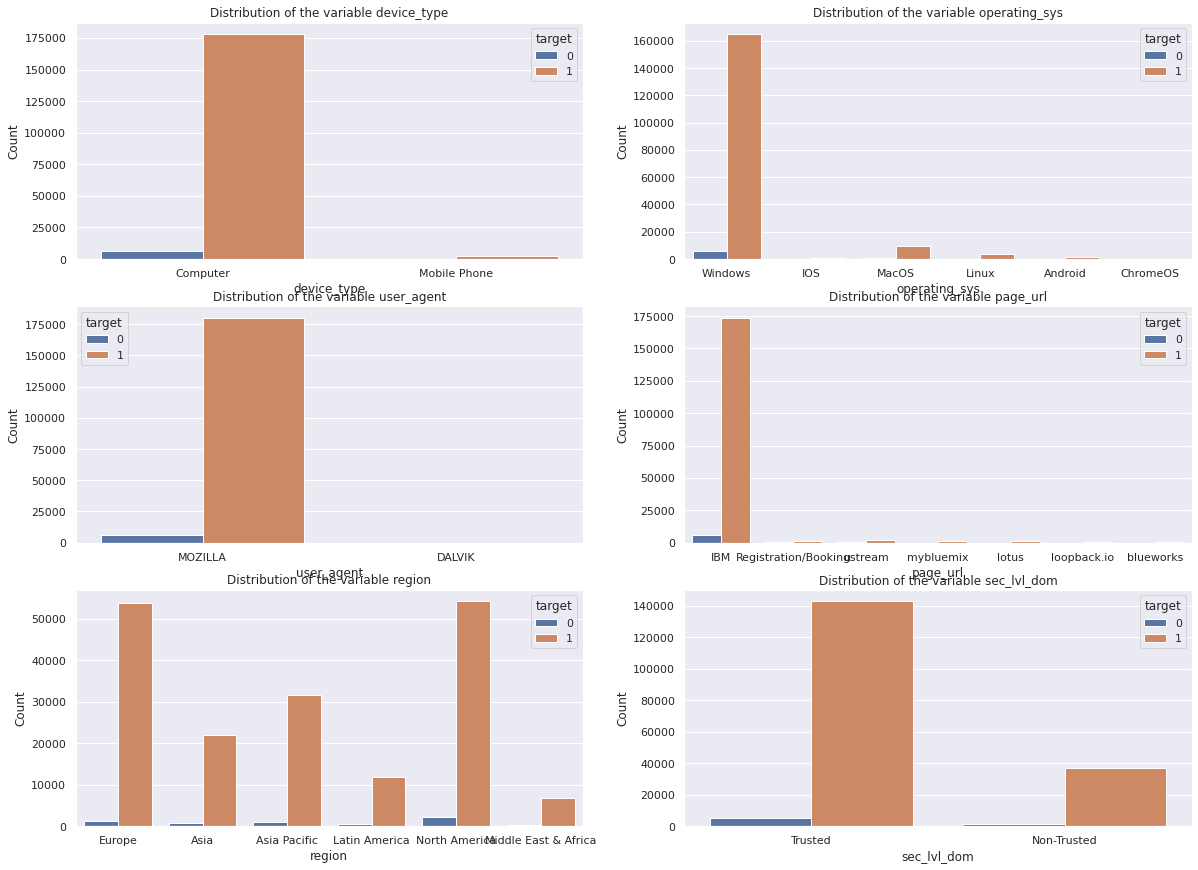

In [60]:
# plot the distribution for the categorical features according to target variable
count = 1
plt.subplots(figsize=(20,20))
for feature in cat_features:
  plt.subplot(4,2,count)
  sns.countplot(bot_df[feature], hue=bot_df['target'])
  plt.title(f'Distribution of the variable {feature}')
  plt.xlabel(f'{feature}')
  plt.ylabel('Count')
  count += 1

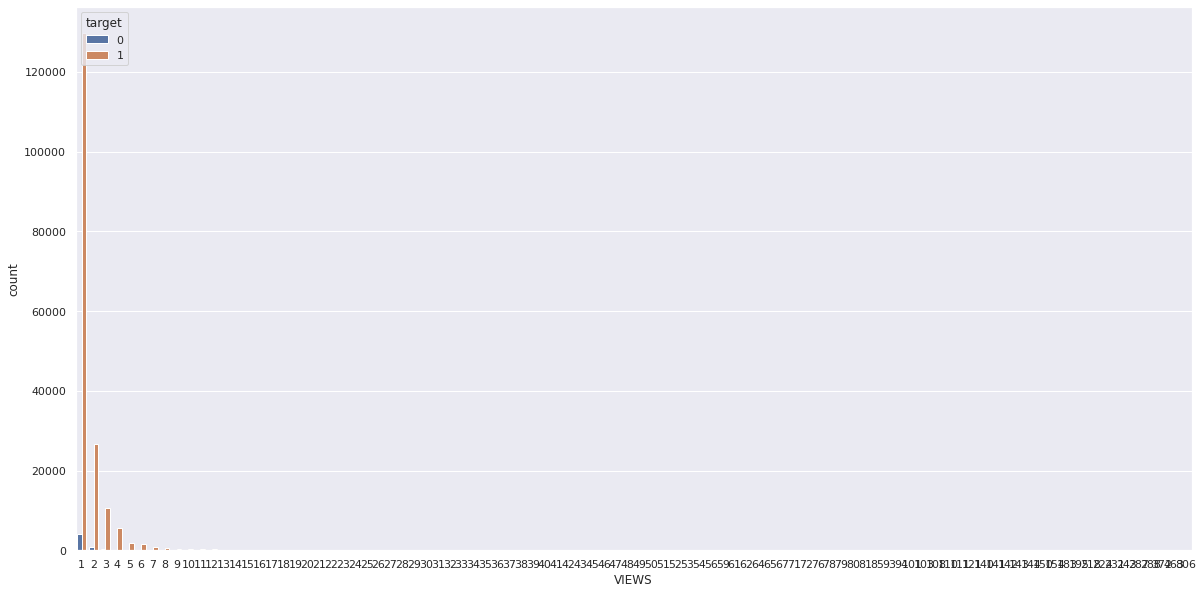

In [61]:
# plot the distribution of views and hour with the target variable
plt.figure(figsize=(20,10))
sns.countplot(bot_df['VIEWS'], hue=bot_df['target'])
plt.show()

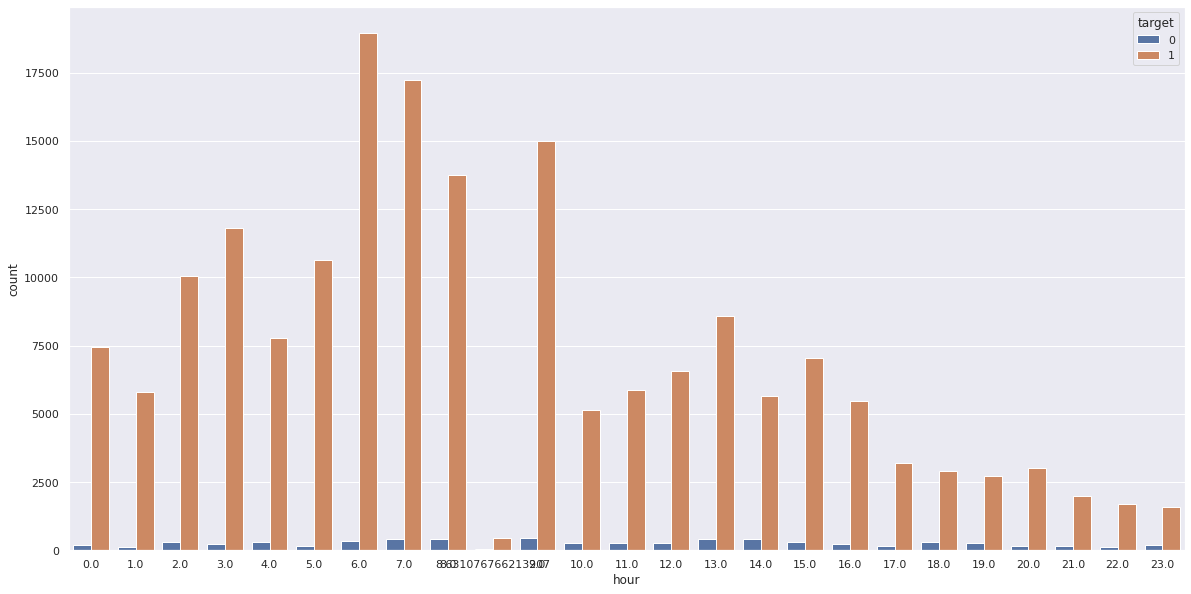

In [62]:
# plot the distribution of views and hour with the target variable
plt.figure(figsize=(20,10))
sns.countplot(bot_df['hour'], hue=bot_df['target'])
plt.show()

#### From the plots above we can observe that views are limited to 1-10 times irrespective of being a bot or human and the bot traffic is more between the hours 6-10 which is the morning time.

### **Let us check the correlation now:**

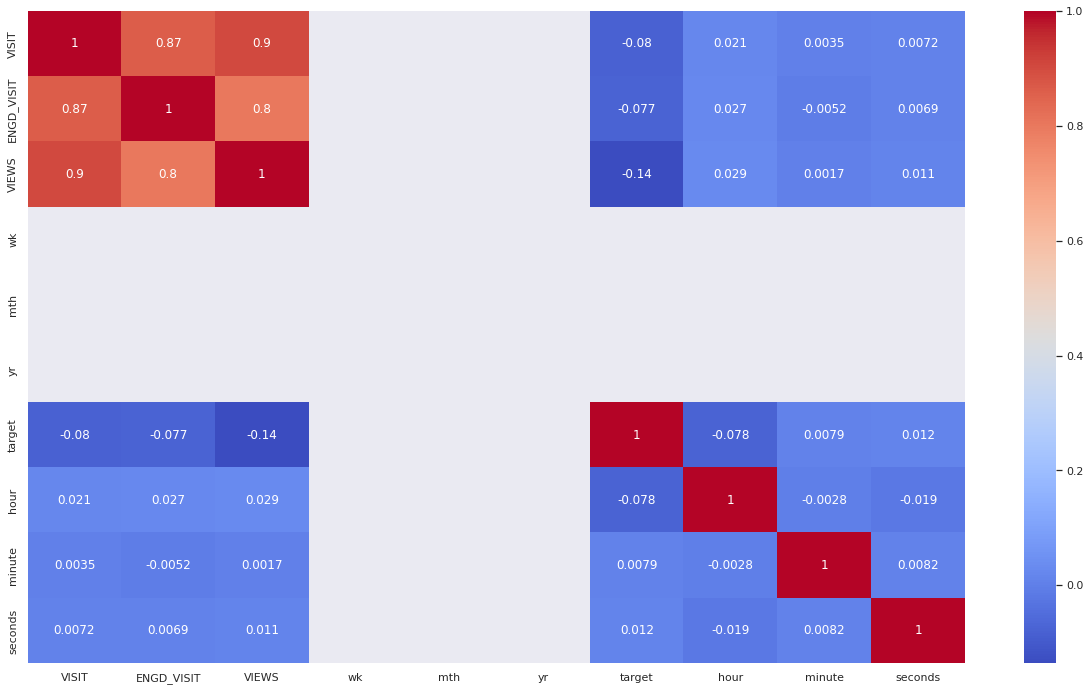

In [63]:
# check correlation with a heatmap
plt.figure(figsize=(21,12))
sns.heatmap(bot_df.corr(), annot=True, cmap='coolwarm')
plt.show()

#### We can clearly observe that VISIT, ENGD_VISIT and VIEWS have high correlation with each other. It is pretty normal as these things depict almost the same thing.

#### Let us drop the VISIT and ENGD_VISIT for now and keep the VIEWS column only.

In [64]:
# drop the visit and engd_visit features
bot_df.drop(['VISIT', 'ENGD_VISIT'], axis=1, inplace=True)
bot_df.head()

,device_type,operating_sys,ip_addr,user_agent,VIEWS,page_url,wk,mth,yr,target,region,hour,minute,seconds,sec_lvl_dom
0,Computer,Windows,d96016a12f445fb7fadb4ff2396934c8345684f9f60299...,MOZILLA,1,IBM,11,3,2019,1,Europe,2.0,28.0,14.0,Trusted
1,Computer,Windows,80e5ef49efbe02e7a7f34a5fb482cd748aa27f3409acc8...,MOZILLA,1,IBM,11,3,2019,1,Europe,7.0,17.0,42.0,Non-Trusted
2,Computer,Windows,9d847da112b5b428419bee77e4387f8d08e7139045285d...,MOZILLA,1,IBM,11,3,2019,1,Europe,9.0,33.0,1.0,Trusted
3,Computer,Windows,16d56bf0f01a14b3f5c97389648b9a01f9f05e0890d0b1...,MOZILLA,1,IBM,11,3,2019,1,Asia,6.0,42.0,19.0,Trusted
4,Computer,Windows,7deb0d8f51dd6d5e10fa7fbc1a7eec42a9a6837058e1e0...,MOZILLA,1,IBM,11,3,2019,1,Asia Pacific,6.0,34.0,28.0,Trusted


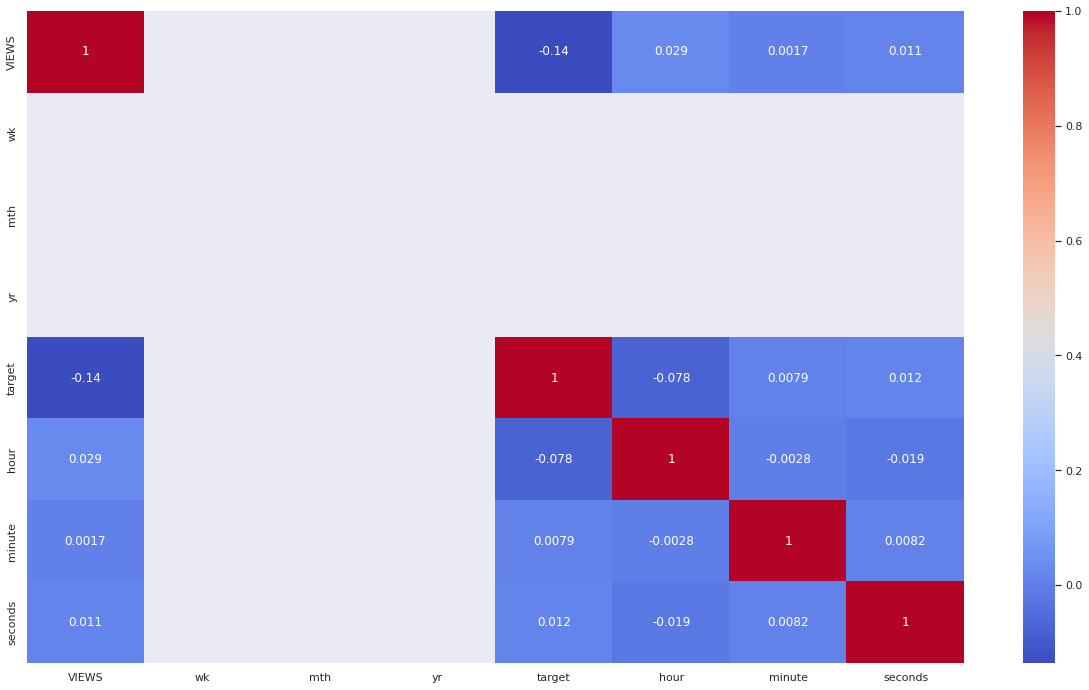

In [65]:
# let us check the correlation again
plt.figure(figsize=(21,12))
sns.heatmap(bot_df.corr(), annot=True, cmap='coolwarm')
plt.show()

### **The next task at our hand is to encode these variables so that we can train our machine learning algorithm on these features.**

In [66]:
# info of the dataset
bot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186814 entries, 0 to 186813
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   device_type    186814 non-null  object 
 1   operating_sys  186814 non-null  object 
 2   ip_addr        186814 non-null  object 
 3   user_agent     186814 non-null  object 
 4   VIEWS          186814 non-null  int64  
 5   page_url       186814 non-null  object 
 6   wk             186814 non-null  int64  
 7   mth            186814 non-null  int64  
 8   yr             186814 non-null  int64  
 9   target         186814 non-null  int64  
 10  region         186814 non-null  object 
 11  hour           186814 non-null  float64
 12  minute         186814 non-null  float64
 13  seconds        186814 non-null  float64
 14  sec_lvl_dom    186814 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 21.4+ MB


In [67]:
# head of the data
bot_df.head()

,device_type,operating_sys,ip_addr,user_agent,VIEWS,page_url,wk,mth,yr,target,region,hour,minute,seconds,sec_lvl_dom
0,Computer,Windows,d96016a12f445fb7fadb4ff2396934c8345684f9f60299...,MOZILLA,1,IBM,11,3,2019,1,Europe,2.0,28.0,14.0,Trusted
1,Computer,Windows,80e5ef49efbe02e7a7f34a5fb482cd748aa27f3409acc8...,MOZILLA,1,IBM,11,3,2019,1,Europe,7.0,17.0,42.0,Non-Trusted
2,Computer,Windows,9d847da112b5b428419bee77e4387f8d08e7139045285d...,MOZILLA,1,IBM,11,3,2019,1,Europe,9.0,33.0,1.0,Trusted
3,Computer,Windows,16d56bf0f01a14b3f5c97389648b9a01f9f05e0890d0b1...,MOZILLA,1,IBM,11,3,2019,1,Asia,6.0,42.0,19.0,Trusted
4,Computer,Windows,7deb0d8f51dd6d5e10fa7fbc1a7eec42a9a6837058e1e0...,MOZILLA,1,IBM,11,3,2019,1,Asia Pacific,6.0,34.0,28.0,Trusted


#### Let us encode the columns which have only two categories with 0 and 1 first.

In [68]:
# encode the columns device_type, user_agent and sec_lvl_dom
bot_df['isComputer'] = bot_df['device_type'].astype(str).apply(lambda x: 1 if x == 'Computer' else 0)
bot_df['isMozilla'] = bot_df['user_agent'].astype(str).apply(lambda x: 1 if x == 'MOZILLA' else 0)
bot_df['isTrusted'] = bot_df['sec_lvl_dom'].astype(str).apply(lambda x: 1 if x == 'Trusted' else 0)
bot_df.head()

,device_type,operating_sys,ip_addr,user_agent,VIEWS,page_url,wk,mth,yr,target,region,hour,minute,seconds,sec_lvl_dom,isComputer,isMozilla,isTrusted
0,Computer,Windows,d96016a12f445fb7fadb4ff2396934c8345684f9f60299...,MOZILLA,1,IBM,11,3,2019,1,Europe,2.0,28.0,14.0,Trusted,1,1,1
1,Computer,Windows,80e5ef49efbe02e7a7f34a5fb482cd748aa27f3409acc8...,MOZILLA,1,IBM,11,3,2019,1,Europe,7.0,17.0,42.0,Non-Trusted,1,1,0
2,Computer,Windows,9d847da112b5b428419bee77e4387f8d08e7139045285d...,MOZILLA,1,IBM,11,3,2019,1,Europe,9.0,33.0,1.0,Trusted,1,1,1
3,Computer,Windows,16d56bf0f01a14b3f5c97389648b9a01f9f05e0890d0b1...,MOZILLA,1,IBM,11,3,2019,1,Asia,6.0,42.0,19.0,Trusted,1,1,1
4,Computer,Windows,7deb0d8f51dd6d5e10fa7fbc1a7eec42a9a6837058e1e0...,MOZILLA,1,IBM,11,3,2019,1,Asia Pacific,6.0,34.0,28.0,Trusted,1,1,1


In [69]:
# now let us drop the original columns
bot_df.drop(['device_type', 'user_agent', 'sec_lvl_dom'], axis=1, inplace=True)
bot_df.head()

,operating_sys,ip_addr,VIEWS,page_url,wk,mth,yr,target,region,hour,minute,seconds,isComputer,isMozilla,isTrusted
0,Windows,d96016a12f445fb7fadb4ff2396934c8345684f9f60299...,1,IBM,11,3,2019,1,Europe,2.0,28.0,14.0,1,1,1
1,Windows,80e5ef49efbe02e7a7f34a5fb482cd748aa27f3409acc8...,1,IBM,11,3,2019,1,Europe,7.0,17.0,42.0,1,1,0
2,Windows,9d847da112b5b428419bee77e4387f8d08e7139045285d...,1,IBM,11,3,2019,1,Europe,9.0,33.0,1.0,1,1,1
3,Windows,16d56bf0f01a14b3f5c97389648b9a01f9f05e0890d0b1...,1,IBM,11,3,2019,1,Asia,6.0,42.0,19.0,1,1,1
4,Windows,7deb0d8f51dd6d5e10fa7fbc1a7eec42a9a6837058e1e0...,1,IBM,11,3,2019,1,Asia Pacific,6.0,34.0,28.0,1,1,1


#### Let us perform one-hot encoding on the other categorical columns now:

In [70]:
# perform one hot encoding
bot_df = pd.get_dummies(bot_df, columns=['operating_sys', 'page_url', 'region'])
bot_df.head()

,ip_addr,VIEWS,wk,mth,yr,target,hour,minute,seconds,isComputer,isMozilla,isTrusted,operating_sys_Android,operating_sys_ChromeOS,operating_sys_IOS,operating_sys_Linux,operating_sys_MacOS,operating_sys_Windows,page_url_IBM,page_url_Registration/Booking,page_url_blueworks,page_url_loopback.io,page_url_lotus,page_url_mybluemix,page_url_ustream,region_Asia,region_Asia Pacific,region_Europe,region_Latin America,region_Middle East & Africa,region_North America
0,d96016a12f445fb7fadb4ff2396934c8345684f9f60299...,1,11,3,2019,1,2.0,28.0,14.0,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0
1,80e5ef49efbe02e7a7f34a5fb482cd748aa27f3409acc8...,1,11,3,2019,1,7.0,17.0,42.0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0
2,9d847da112b5b428419bee77e4387f8d08e7139045285d...,1,11,3,2019,1,9.0,33.0,1.0,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0
3,16d56bf0f01a14b3f5c97389648b9a01f9f05e0890d0b1...,1,11,3,2019,1,6.0,42.0,19.0,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
4,7deb0d8f51dd6d5e10fa7fbc1a7eec42a9a6837058e1e0...,1,11,3,2019,1,6.0,34.0,28.0,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0


In [71]:
# shape of the data
bot_df.shape

(186814, 31)

In [72]:
# info of the data
bot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186814 entries, 0 to 186813
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ip_addr                        186814 non-null  object 
 1   VIEWS                          186814 non-null  int64  
 2   wk                             186814 non-null  int64  
 3   mth                            186814 non-null  int64  
 4   yr                             186814 non-null  int64  
 5   target                         186814 non-null  int64  
 6   hour                           186814 non-null  float64
 7   minute                         186814 non-null  float64
 8   seconds                        186814 non-null  float64
 9   isComputer                     186814 non-null  int64  
 10  isMozilla                      186814 non-null  int64  
 11  isTrusted                      186814 non-null  int64  
 12  operating_sys_Android         

### We have performed few operations on our train dataset to prepare it for training models:

* Derived the region/continent from country, city, state and operating team names and removed the original columns.

* Segregated the domains into primary and secondary then removed the primary domains from the dataset.

* Reduced the number of categories of operating systems and filled up device type column with the help of operating systems.

* Reduced the number of categories of user_agent or browser into two: Mozilla and Dalvik.

* Got the main page names out of the page_url and reduced the number of categories.

* Extracted hour, min, secs from page_vw_ts.

* Categorized secondary domain into trusted and non-trusted ones.

* Encoded the features with suitable methods.

### Now we will have to do the same operations on the test dataset so that our model performs well.

### **Let's load the test dataset:**

In [73]:
# loading the data
test_df = pd.read_csv('/content/drive/My Drive/Bot Prediction Kaggle Challenge/test.csv')
test_df.head()

,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,wk,mth,yr,page_vw_ts
0,Japan,Japan,Japan,CHIYODA-KU,TOKYO,HITACHI.CO.JP,NaN,MICROSOFT_WINDOWS10,b8a8233899cbd26ba1e2207af00ed76f6d3a2393f9967a...,MOZILLA/5.0 (WINDOWS NT 10.0; WIN64; X64) APPL...,1,1,3,www-01.ibm.com/marketing/iwm/iwm/web/download....,11,3,2019,2019-06-04 06:10:05.058800
1,India,India-South Asia,Asia Pacific,MUMBAI,MAHARASHTRA,NaN,NaN,MICROSOFT_WINDOWS7,ff2af055edd62f7fdbc71abcd79df8e3163d03a5d28044...,MOZILLA/5.0 (WINDOWS NT 6.1; WIN64; X64) APPLE...,1,0,1,www.ibm.com/support/knowledgecenter/en/ssw_aix...,11,3,2019,2019-06-04 18:32:03.077300
2,South Africa,Middle East & Africa,Middle East & Africa,JOHANNESBURG,GAUTENG,VOXDSL.CO.ZA,NaN,MICROSOFT_WINDOWS10,c9a6ee3cbaa5fcf0558cbd78d17080d530498f5f1c8f90...,MOZILLA/5.0 (WINDOWS NT 10.0; WIN64; X64) APPL...,1,0,1,www.ibm.com/support/knowledgecenter/en/ss6pnw_...,11,3,2019,2019-06-04 20:24:25.010500
3,Thailand,ASEAN,Asia Pacific,BANGKOK,KRUNG THEP,KASIKORNBANK.COM,NaN,MICROSOFT_WINDOWS10,a3d979dcc283bb6868219c2950f1531ea687c9ea92f17d...,MOZILLA/5.0 (WINDOWS NT 10.0; WIN64; X64) APPL...,1,0,1,www.ibm.com/support/knowledgecenter/en/ssepek_...,11,3,2019,2019-06-04 05:54:34.043800
4,Italy,Italy,Europe,MILANO,MILANO,SOGEI.IT,NaN,MICROSOFT_WINDOWS10,e82fee207265814f1b76e349cc96df09d74c9b6a93ff91...,MOZILLA/5.0 (WINDOWS NT 10.0; WIN64; X64) APPL...,1,0,1,content-dsxlocal.mybluemix.net/docs/content/ss...,11,3,2019,2019-06-04 06:47:24.014400
